# TensorFlow Regression

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
print(tf.__version__)

2.8.0


#### 0. Familiarizing with concepts

In [3]:
def func(X):
  return X + 10

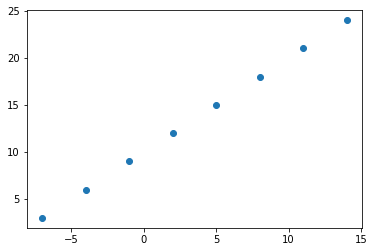

In [4]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
Y = func(X)
plt.scatter(X, Y)

**First Model**

In [5]:
tf.random.set_seed(27)

model = tf.keras.Sequential([
     tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,  # mean absolute error
              optimizer = tf.keras.optimizers.SGD(),  # stochastic gradient descent
              metrics = ['mae'])

model.fit(tf.expand_dims(X, axis=-1), Y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 758ms/step - loss: 13.2017 - mae: 13.2017
Epoch 2/5
1/1 [==============================] - 0s 22ms/step - loss: 13.0692 - mae: 13.0692
Epoch 3/5
1/1 [==============================] - 0s 26ms/step - loss: 12.9367 - mae: 12.9367
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 12.8042 - mae: 12.8042
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 12.6717 - mae: 12.6717


In [6]:
# Trying to predict, should be around 30
model.predict([20.0])

array([[5.254595]], dtype=float32)

**Improving previous model with higher "epochs"**

In [7]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,  # mean absolute error
              optimizer = tf.keras.optimizers.SGD(),  # stochastic gradient descent
              metrics = ['mae'])

# Training more
model.fit(tf.expand_dims(X, axis=-1), Y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 760ms/step - loss: 13.6389 - mae: 13.6389
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 13.5064 - mae: 13.5064
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 13.3739 - mae: 13.3739
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 13.2414 - mae: 13.2414
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 13.1089 - mae: 13.1089
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 12.9764 - mae: 12.9764
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8439 - mae: 12.8439
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 12.7114 - mae: 12.7114
Epoch 9/100
1/1 [==============================] - 0s 32ms/step - loss: 12.5789 - mae: 12.5789
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 12.4464 - mae: 12.4464
Epoch 11/100
1/1 [==============================

In [8]:
# Trying to predict, should be around 30
model.predict([20.0])

array([[35.08137]], dtype=float32)

**Evaluating and Visualization**

In [9]:
X = np.arange(-100, 100, 4)
y = X + 10
X, y

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

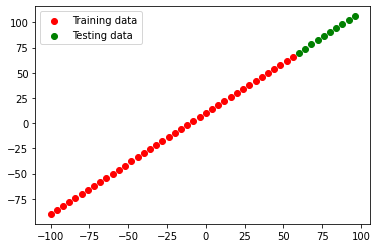

In [10]:
train_set_len = int(0.8 * len(X)) # the test set is 80% of the data 

X_train = X[:train_set_len]
y_train = y[:train_set_len]

X_test = X[train_set_len:]
y_test = y[train_set_len:]

plt.scatter(X_train, y_train, c = 'red', label = 'Training data')
plt.scatter(X_test, y_test, c = 'green', label = 'Testing data')
plt.legend()

In [11]:
model = tf.keras.Sequential ([
  tf.keras.layers.Dense(1, input_shape = [1])
])

model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X_train, y_train, epochs=100, verbose=0)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


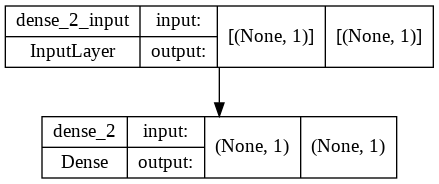

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

**Predictions**

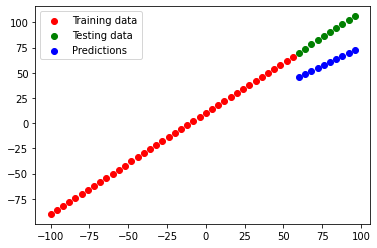

In [13]:
y_preds = model.predict(X_test)

plt.scatter(X_train, y_train, c = 'red', label = 'Training data')
plt.scatter(X_test, y_test, c = 'green', label = 'Testing data')
plt.scatter(X_test, y_preds, c = 'blue', label = 'Predictions')
plt.legend()

#### 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

[-20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3
  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
  16  17  18  19  20]
[410 371 334 299 266 235 206 179 154 131 110  91  74  59  46  35  26  19
  14  11  10  11  14  19  26  35  46  59  74  91 110 131 154 179 206 235
 266 299 334 371 410]


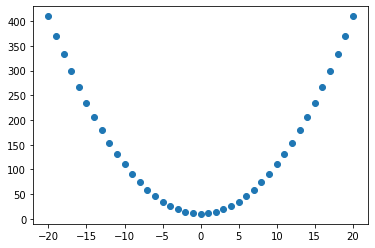

In [14]:
def func(X):
  return X**2 + 10

X = np.arange(-20, 21, 1)
y = func(X)
print(X)
print(y)
plt.scatter(X, y)

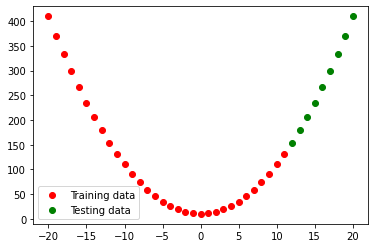

In [15]:
train_set_len = int(0.8 * len(X)) # the test set is 80% of the data 


X_train = X[:train_set_len]
y_train = y[:train_set_len]

X_test = X[train_set_len:]
y_test = y[train_set_len:]


plt.scatter(X_train, y_train, c = 'red', label = 'Training data')
plt.scatter(X_test, y_test, c = 'green', label = 'Testing data')
plt.legend()

In [16]:
model = tf.keras.Sequential ([
  tf.keras.layers.Dense(1, input_shape = [1])
])

model.compile(loss = tf.keras.losses.MeanSquaredLogarithmicError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae","accuracy"])

model.fit(X_train, y_train, epochs=2000, verbose=0)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


[[ -60.318794]
 [ -65.78387 ]
 [ -71.24895 ]
 [ -76.71403 ]
 [ -82.1791  ]
 [ -87.64417 ]
 [ -93.10925 ]
 [ -98.57433 ]
 [-104.039406]]
[12 13 14 15 16 17 18 19 20]


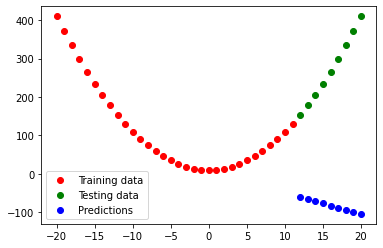

In [17]:
y_preds = model.predict(X_test)
print(y_preds)
print(X_test)

plt.scatter(X_train, y_train, c = 'red', label = 'Training data')
plt.scatter(X_test, y_test, c = 'green', label = 'Testing data')
plt.scatter(X_test, y_preds, c = 'blue', label = 'Predictions')
plt.legend()

#### 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [18]:
model = tf.keras.Sequential ([
  tf.keras.layers.Dense(1, input_shape = [1]),
  tf.keras.layers.Dense(10, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "relu")
])

model.compile(loss = tf.keras.losses.MeanSquaredLogarithmicError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae","accuracy"])

model.fit(X_train, y_train, epochs=2000, verbose=0)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 100)               1100      
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,223
Trainable params: 1,223
Non-trainable params: 0
_________________________________________________________________


[[136.05336]
 [146.93233]
 [157.81134]
 [168.6903 ]
 [179.56929]
 [190.44829]
 [201.32727]
 [212.20625]
 [223.08524]]
[12 13 14 15 16 17 18 19 20]


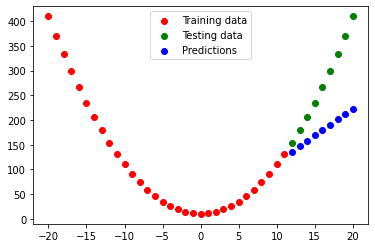

In [19]:
y_preds = model.predict(X_test)
print(y_preds)
print(X_test)

plt.scatter(X_train, y_train, c = 'red', label = 'Training data')
plt.scatter(X_test, y_test, c = 'green', label = 'Testing data')
plt.scatter(X_test, y_preds, c = 'blue', label = 'Predictions')
plt.legend()

#### 3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)? 

In [20]:
model = tf.keras.Sequential ([
  tf.keras.layers.Dense(1, input_shape = [1]),
  tf.keras.layers.Dense(100, activation = "relu"),  # changed hidden layers
  tf.keras.layers.Dense(10, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "relu")
])

model.compile(loss = tf.keras.losses.MeanSquaredLogarithmicError(),      
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),  # learning_rate 10x
              metrics=["mae","accuracy"])

model.fit(X_train, y_train, epochs=5000, verbose=0)   #  + epochs
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
 dense_9 (Dense)             (None, 100)               200       
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,223
Trainable params: 1,223
Non-trainable params: 0
_________________________________________________________________


[[145.26979]
 [162.73189]
 [180.19405]
 [197.65617]
 [215.11943]
 [232.58382]
 [250.04825]
 [267.51266]
 [284.97708]]
[12 13 14 15 16 17 18 19 20]


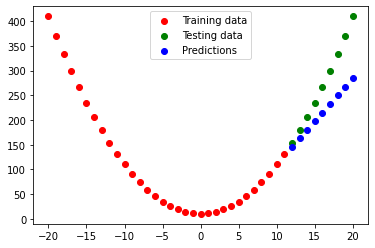

In [21]:
y_preds = model.predict(X_test)
print(y_preds)
print(X_test)

plt.scatter(X_train, y_train, c = 'red', label = 'Training data')
plt.scatter(X_test, y_test, c = 'green', label = 'Testing data')
plt.scatter(X_test, y_preds, c = 'blue', label = 'Predictions')
plt.legend()

In [22]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 201ms/step - loss: 0.0542 - mae: 57.5452 - accuracy: 0.0000e+00


[0.05423207953572273, 57.54520797729492, 0.0]

#### 4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.

In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [24]:
x_train.shape, y_train.shape

((404, 13), (404,))

In [25]:
x_test.shape, y_test.shape

((102, 13), (102,))

Visualizing the data (x_train)

In [26]:
import pandas as pd

pd.DataFrame (x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


Creating model

In [27]:
tf.random.set_seed(42)

model = tf.keras.Sequential ([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

model.compile( loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae']
)

history1 = model.fit(x_train, y_train, epochs = 100, verbose = 0)

In [28]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 5.1132 - mae: 5.1132


[5.113162994384766, 5.113162994384766]

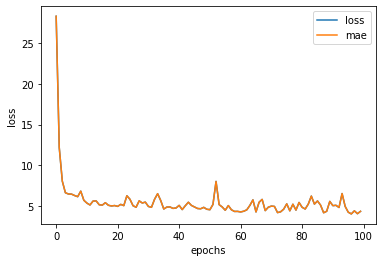

In [29]:
pd.DataFrame(history1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");